In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
import os

In [3]:
pwd = os.getcwd()

In [4]:
df = pd.read_csv(pwd+'\\netflix_titles.csv')

In [5]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1810,s1811,Movie,Don Verdean,Jared Hess,"Sam Rockwell, Amy Ryan, Will Forte, Danny McBr...",United States,"March 1, 2020",2015,PG-13,96 min,Comedies,A questionable character working as a self-sty...
1241,s1242,Movie,Cat on a Hot Tin Roof,Richard Brooks,"Elizabeth Taylor, Paul Newman, Burl Ives, Jack...",United States,"November 1, 2019",1958,NR,108 min,"Classic Movies, Dramas",Members of a Southern clan scramble to curry f...
1858,s1859,Movie,Dragons: Rescue Riders: Hunt for the Golden Dr...,"TJ Sullivan, Greg Rankin","Noah Kaye Bentley, Brennley Brown, Zach Callis...",United States,"March 27, 2020",2020,TV-Y,46 min,"Children & Family Movies, Comedies",It's the treasure hunt of a lifetime for the R...
498,s499,Movie,An Upper Egyptian,"Ismail Farouk, Hazem Fouda","Mohamed Ramadan, Randa El Behery, Nermin Maher...",Egypt,"June 20, 2019",2014,TV-MA,85 min,"Comedies, Dramas, International Movies","Eager to settle down, Abdullah searches for th..."
960,s961,Movie,Black Rose,Alexander Nevsky,"Alexander Nevsky, Kristanna Loken, Adrian Paul...","Russia, United States","July 2, 2017",2014,TV-MA,83 min,"Action & Adventure, International Movies",When a number of Russian women are brutally mu...


In [6]:
df.shape

(7787, 12)

In [7]:
df1=df.copy()

In [8]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df1.dropna(inplace=True)

In [10]:
df1.shape

(4808, 12)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4808 non-null   object
 1   type          4808 non-null   object
 2   title         4808 non-null   object
 3   director      4808 non-null   object
 4   cast          4808 non-null   object
 5   country       4808 non-null   object
 6   date_added    4808 non-null   object
 7   release_year  4808 non-null   int64 
 8   rating        4808 non-null   object
 9   duration      4808 non-null   object
 10  listed_in     4808 non-null   object
 11  description   4808 non-null   object
dtypes: int64(1), object(11)
memory usage: 488.3+ KB


In [12]:
df1['date_added'].dtype

dtype('O')

In [13]:
df1['date_added'] = pd.to_datetime(df1['date_added'])
df1['month_added'] = df1['date_added'].dt.month 
df1['seasons'] = df1.apply(lambda x: int(x['duration'].split(" ")[0]) if 'Season' in x['duration'] else "",axis=1)
df1['duration'] = df1.apply(lambda x: int (x['duration'].split(" ")[0]) if 'Season' not in x['duration'] else "", axis=1)

In [14]:
df1['year_added'] = df1['date_added'].dt.year 

In [15]:
df1.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,seasons,year_added
3902,s3903,Movie,Manglehorn,David Gordon Green,"Al Pacino, Holly Hunter, Harmony Korine, Chris...",United States,2017-04-16,2014,PG-13,97,"Dramas, Independent Movies",A reclusive small-town locksmith who can't sto...,4,,2017
4095,s4096,Movie,Mike Epps: Only One Mike,Kevin Bray,Mike Epps,United States,2019-06-25,2019,TV-MA,63,Stand-Up Comedy,"In a raw stand-up comedy special, Mike Epps mi...",6,,2019
3528,s3529,Movie,Lang Tong,Sam Loh,"William Lawandi, Angeline Yap, Vivienne Tseng,...",Singapore,2018-12-20,2015,TV-MA,82,"International Movies, Thrillers","After seducing a philandering con man, a rebel...",12,,2018


In [16]:
df1[df1['type']=='TV Show'].sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,seasons,year_added
4860,s4861,TV Show,Pine Gap,Mat King,"Parker Sawyers, Jacqueline McKenzie, Steve Tou...",Australia,2018-12-07,2018,TV-MA,,"International TV Shows, TV Dramas",At top-secret U.S.-Australian joint defense fa...,12,1,2018
3951,s3952,TV Show,Mars,Everardo Gout,"Jihae, Alberto Ammann, Clémentine Poidatz, Ana...",United States,2019-11-01,2018,TV-PG,,"Docuseries, Science & Nature TV, TV Dramas",Fact meets fiction in this docudrama chronicli...,11,2,2019
322,s323,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,2020-10-31,2017,TV-PG,,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...,10,1,2020
3334,s3335,TV Show,Ken Burns: The Civil War,Ken Burns,"Sam Waterston, Julie Harris, Jason Robards, Mo...",United States,2017-02-22,1990,TV-14,,Docuseries,Ken Burns's documentary depicts the action of ...,2,1,2017
1540,s1541,TV Show,Criminal: Spain,Mariano Barroso,"Emma Suárez, Jorge Bosch, Álvaro Cervantes, Ca...",Spain,2019-09-20,2019,TV-MA,,"Crime TV Shows, International TV Shows, Spanis...",Psychological games abound between detectives ...,9,1,2019


In [17]:
movies = df1[df1['type']=='Movie']
movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,seasons,year_added
268,s269,Movie,Aalorukkam,V C Abhilash,"Indrans, Sreekanth Menon, Vishnu Agasthya, Ali...",India,2018-11-15,2018,TV-PG,122,"Dramas, Independent Movies, International Movies",When an aging father seeks the help of a docto...,11,,2018
1098,s1099,Movie,Bride For Rent,Mae Czarina Cruz,"Kim Chiu, Xian Lim, Empoy Marquez, Martin del ...",Philippines,2019-02-27,2014,TV-PG,110,"Comedies, International Movies, Romantic Movies",Rocco needs to hire a bride so he can access h...,2,,2019
7623,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,2020-01-01,1999,PG-13,106,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",1,,2020
6602,s6603,Movie,The Little Prince,Mark Osborne,"Jeff Bridges, Mackenzie Foy, Rachel McAdams, R...","France, Canada, Italy, United States, China",2020-11-06,2015,PG,107,Children & Family Movies,When an overscheduled girl befriends an eccent...,11,,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119,Dramas,After one of his high school students attacks ...,11,,2019


In [18]:
series = df1[df1['type']=='TV Show']
series.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,seasons,year_added
6359,s6360,TV Show,The Flash,Glen Winter,"Grant Gustin, Candice Patton, Danielle Panabak...",United States,2020-05-20,2019,TV-14,,"Crime TV Shows, TV Action & Adventure, TV Sci-...",A forensics expert who wakes from a coma with ...,5,6,2020
2431,s2432,TV Show,Girls und Panzer,Tsutomu Mizushima,"Mai Fuchigami, Ai Kayano, Mami Ozaki, Ikumi Na...",Japan,2019-12-15,2012,TV-PG,,"Anime Series, International TV Shows",Miho Nishizumi tries to escape her family's tr...,12,1,2019
7400,s7401,TV Show,Velvet,Carlos Sedes,"Paula Echevarría, Miguel Ángel Silvestre, Aita...",Spain,2020-03-04,2016,TV-14,,"International TV Shows, Romantic TV Shows, Spa...","In 1950s Spain, the heir to a fashion house ro...",3,4,2020
6203,s6204,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States",2021-01-01,2014,TV-Y,,Kids' TV,"The Cat in the Hat is back – and this time, he...",1,1,2021
3002,s3003,TV Show,Inhuman Resources,Ziad Doueiri,"Eric Cantona, Suzanne Clément, Alex Lutz, Gust...",France,2020-05-15,2020,TV-MA,,"Crime TV Shows, International TV Shows, TV Dramas","Alain Delambre, unemployed and 57, is lured by...",5,1,2020


C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



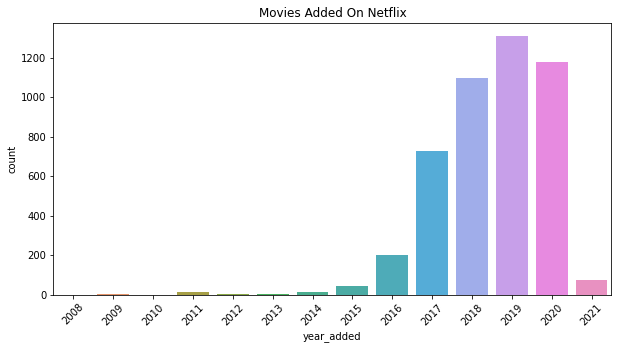

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(movies['year_added'])
plt.xticks(rotation=45)
plt.title("Movies Added On Netflix")
plt.show()

C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



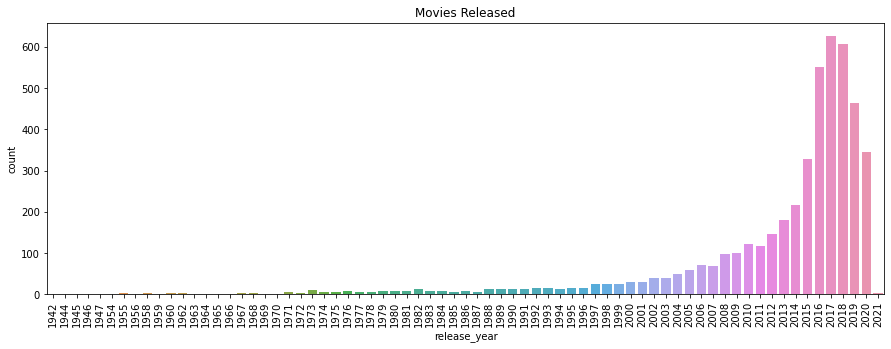

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(movies['release_year'])
plt.xticks(rotation=90)
plt.title("Movies Released")
plt.show()

C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



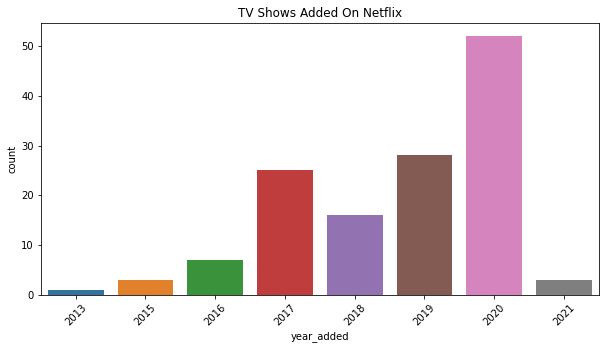

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(series['year_added'])
plt.xticks(rotation=45)
plt.title("TV Shows Added On Netflix")
plt.show()

C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



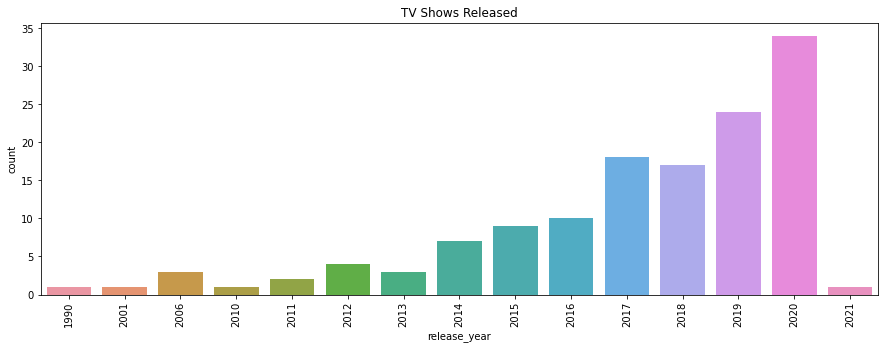

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(series['release_year'])
plt.xticks(rotation=90)
plt.title("TV Shows Released")
plt.show()

In [23]:
indian = df1[df['country']=='India']
indian.sample(5)

C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,seasons,year_added
4045,s4046,Movie,Merku Thodarchi Malai,Lenin Bharathi,"Antony, Gayathri Krishna, Abu Valayamkulam, An...",India,2019-01-01,2018,TV-MA,115,"Dramas, Independent Movies, International Movies","In southern India, a laborer's dreams of ownin...",1,,2019
5267,s5268,Movie,Romeo Akbar Walter,Robbie Grewal,"John Abraham, Jackie Shroff, Mouni Roy, Sikand...",India,2019-06-30,2019,TV-14,141,"Dramas, International Movies, Thrillers","In 1971, a fallen army major’s son is tapped b...",6,,2019
3280,s3281,Movie,Kabhi Alvida Naa Kehna,Karan Johar,"Amitabh Bachchan, Shah Rukh Khan, Abhishek Bac...",India,2020-04-01,2006,TV-14,192,"Dramas, International Movies, Romantic Movies","Unhappy in their respective marriages, an ex-f...",4,,2020
278,s279,Movie,ABCD 2,Remo D'Souza,"Prabhu Deva, Varun Dhawan, Shraddha Kapoor, La...",India,2018-11-01,2015,TV-14,146,"Dramas, International Movies, Music & Musicals",After being accused of cheating on a reality T...,11,,2018
7302,s7303,Movie,Ujala,Naresh Saigal,"Mala Sinha, Shammi Kapoor, Raaj Kumar, Leela C...",India,2017-10-15,1959,TV-14,143,"Dramas, International Movies",An honest man dreams of a better life for his ...,10,,2017


C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



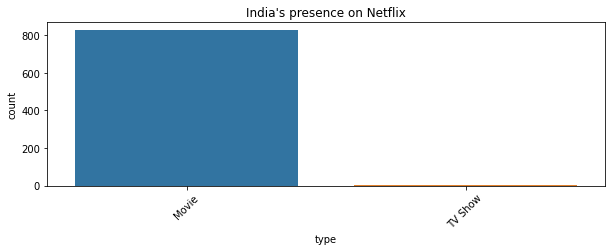

In [24]:
plt.figure(figsize=(10,3))
ax=sns.countplot(indian['type'])
plt.xticks(rotation=45)
plt.title("India's presence on Netflix")
plt.show()

C:\Users\Udhhav Arora\Anaconda3\envs\chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



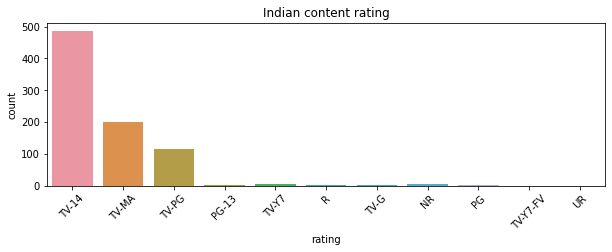

In [25]:
plt.figure(figsize=(10,3))
ax=sns.countplot(indian['rating'])
plt.xticks(rotation=45)
plt.title("Indian content rating")
plt.show()

In [26]:
all_countries = df1.groupby(['country','type']).count()['show_id'].reset_index()
all_countries.head()

,country,type,show_id
0,Argentina,Movie,31
1,Argentina,TV Show,1
2,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
3,"Argentina, Chile",Movie,1
4,"Argentina, Chile, Peru",Movie,1


In [27]:
world = df1[df1['country']!='India']
world.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,seasons,year_added
6880,s6881,Movie,The Smurfs,Raja Gosnell,"Hank Azaria, Neil Patrick Harris, Jayma Mays, ...","United States, Belgium, Canada",2020-09-01,2011,PG,103,"Children & Family Movies, Comedies","When evil Gargamel tries to capture them, the ...",9,,2020
1357,s1358,Movie,Chris Tucker Live,Phil Joanou,Chris Tucker,United States,2015-07-10,2015,TV-MA,92,Stand-Up Comedy,"Filmed in his hometown of Atlanta, Chris Tucke...",7,,2015
3800,s3801,Movie,Luccas Neto em: Acampamento de Férias 2,Lucas Margutti,"Luccas Neto, Giovanna Alparone, Jéssica Diehl,...",Brazil,2020-05-04,2020,TV-G,81,"Children & Family Movies, Comedies, Music & Mu...",Luccas and his band of buddies make music and ...,5,,2020
5778,s5779,Movie,Spy Time,Javier Ruiz Caldera,"Imanol Arias, Quim Gutiérrez, Alexandra Jiméne...",Spain,2016-06-01,2015,TV-MA,93,"Action & Adventure, Comedies, International Mo...",When his girlfriend dumps him for being a bore...,6,,2016
1384,s1385,Movie,Chupan Chupai,Mohsin Ali,"Ahsan Khan, Neelam Muneer, Faizan Khawaja, Ali...",Pakistan,2019-01-15,2017,TV-14,118,"Comedies, International Movies","The lives of five hapless, petty criminals car...",1,,2019


In [28]:
df1['Country_type'] = df.apply(lambda x : "India" if 'India' == x['country'] else "Rest Of the World", axis=1)

In [29]:
# fig = px.histogram(df1, x='type',color='Country_type', barmode='group',color_discrete_map={'Rest Of the World':'#221F1F','India':'#E50914'})
# fig.update_layout(title='Content type distribution India vs World')
# fig.show()

In [30]:
import warnings
warnings.filterwarnings('ignore')

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

In [31]:
df2 = df1.copy()

In [32]:
df2['description'] = df2['description'].str.lower()
df2['description'].head()

1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
5    a genetics professor experiments with a treatm...
Name: description, dtype: object

In [33]:
desc_split = df2['description'].str.split(" ")
desc_split.head()

1    [after, a, devastating, earthquake, hits, mexi...
2    [when, an, army, recruit, is, found, dead,, hi...
3    [in, a, postapocalyptic, world,, rag-doll, rob...
4    [a, brilliant, group, of, students, become, ca...
5    [a, genetics, professor, experiments, with, a,...
Name: description, dtype: object

In [34]:
all_spam_cleaned = []

for text in desc_split:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:500]

"after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp in a postapocalyptic world rag-doll robots hide in fear from dangerous machines out to exterminate them until a brave newcomer joins the group a brilliant group of students become card-counting experts wit"

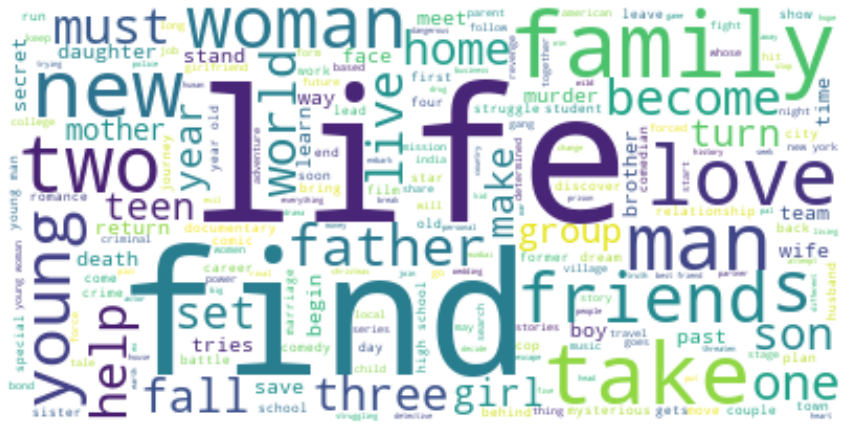

In [35]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()